# Analysis of helicopter prison escape attempts

In this project, I analyze data from Wikipedia ([source](https://en.wikipedia.org/wiki/List_of_helicopter_prison_escapes)) examining prison escape attempts by helicopter.

In this report, I tackle several questions:
- How has the number of prison escape attempts per year evolved over time?
- In which countries were prison escape attempts by helicopter most common?
- What proportion of escape attempts were successful, and in which countries did the most successful attempts occur?

## Setup

We start by importing relevant libraries.

In [186]:
import pandas as pd
import re
import matplotlib.pyplot as plt
from IPython.core.display import display, HTML
%matplotlib inline

## Retrieve data

Next, we retrieve the data from the [list of helicopter prison escapes](https://en.wikipedia.org/wiki/List_of_helicopter_prison_escapes) Wikipedia article.

In [187]:
url = 'https://en.wikipedia.org/wiki/List_of_helicopter_prison_escapes'
df = pd.read_html(url)[1]
data = df.to_numpy().tolist()

For a concise preview of the data, we remove the "Details" in each row of the data, which contains a large amount of text about each escape:

In [188]:
# modify data so that defails are not present for preview
index = 0
for row in data:
    data[index] = row[:5]
    index += 1

Now we preview the first 3 rows in the data:

In [189]:
print(data[:3])

[['August 19, 1971', 'Santa Martha Acatitla', 'Mexico', 'Yes', 'Joel David Kaplan Carlos Antonio Contreras Castro'], ['October 31, 1973', 'Mountjoy Jail', 'Ireland', 'Yes', "JB O'Hagan Seamus TwomeyKevin Mallon"], ['May 24, 1978', 'United States Penitentiary, Marion', 'United States', 'No', 'Garrett Brock TrapnellMartin Joseph McNallyJames Kenneth Johnson']]


## How has the number of prison escapes per year evolved over time?

We first want to examine the number of prison escapes per year. To do so, we first need to find the range of years in the dataset. I create a function to extract the year and apply it to each date in the data: 

In [190]:
# function to extract year from date, 
# which is provided in the data as mm dd, yyyy
def get_year(date_string):
    # find year in the date string
    year = int(re.findall("\d{4}", date_string)[0])
    return year

# apply function to each row in the data
for row in data:
    row[0] = fetch_year(row[0])

We can confirm that the step above worked, by again examining the first three dates in the data:

In [191]:
for row in data[:3]:
    print(row[0])

1971
1973
1978


Next, we find the maximum and minimum dates in the data:

In [192]:
# find minimum and maximum years in the data
min_year = min(data, key=lambda x: x[0])[0]
max_year = max(data, key=lambda x: x[0])[0]

print(min_year, max_year)

1971 2020


We want to subsequently calculate the number of escape attempts by helicopter per year. So we create a new list of lists, where each list has two elements: a year, and how many attempts occurred in that year.

The first step is creating the list of lists, with the year filled in and the number of attempts per year set to 0:

In [193]:
attempts_per_year = []
for y in range(min_year, max_year + 1):
    attempts_per_year.append([y, 0])

Next, we iterate over rows in the data, and years in the calculated range, to determine the number of escape attempts per year:

In [194]:
for row in data:
    for ya in attempts_per_year:
        
        y = ya[0] 
        
        # if current row's year matches this year,
        # then add to tally
        if row[0] == y:
            ya[1] += 1

print(attempts_per_year)

[[1971, 1], [1972, 0], [1973, 1], [1974, 0], [1975, 0], [1976, 0], [1977, 0], [1978, 1], [1979, 0], [1980, 0], [1981, 2], [1982, 0], [1983, 1], [1984, 0], [1985, 2], [1986, 3], [1987, 1], [1988, 1], [1989, 2], [1990, 1], [1991, 1], [1992, 2], [1993, 1], [1994, 0], [1995, 0], [1996, 1], [1997, 1], [1998, 0], [1999, 1], [2000, 2], [2001, 3], [2002, 2], [2003, 1], [2004, 0], [2005, 2], [2006, 1], [2007, 3], [2008, 0], [2009, 3], [2010, 1], [2011, 0], [2012, 1], [2013, 2], [2014, 1], [2015, 0], [2016, 1], [2017, 0], [2018, 1], [2019, 0], [2020, 1]]


Having calculated the number of escape attempts per year, we can use a barplot to visualize the results:

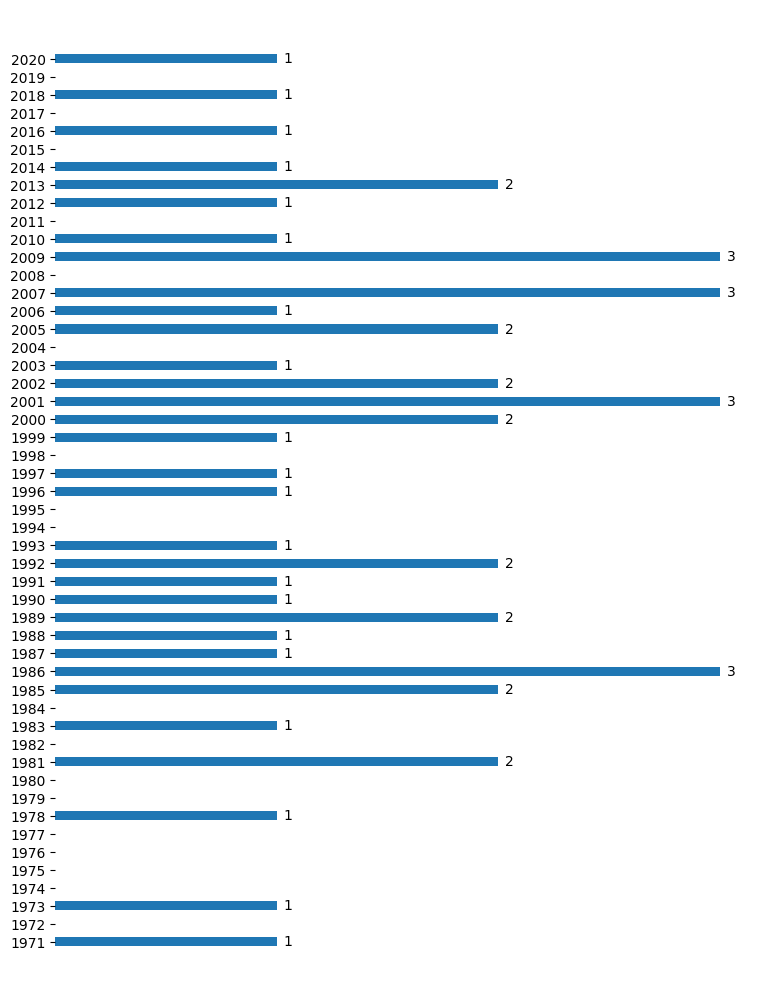

In [195]:
# convert attempts_per_year to dictionary for plotting
d = {ya[0]:ya[1] for ya in attempts_per_year}

# create vertical barplot
plt.figure(figsize=(9, 13))
axes = plt.axes()
axes.get_xaxis().set_visible(False)
spines = axes.spines
spines['top'].set_visible(False)
spines['right'].set_visible(False)
spines['bottom'].set_visible(False)
spines['left'].set_visible(False)
ax = plt.barh(range(len(d)), list(d.values()), height = .5)
plt.yticks(range(len(d)), list(d.keys()))
plt.xticks(range(4), range(4))

# show label with value for each bar
rectangles = ax.patches
for rectangle in rectangles:
    x_value = rectangle.get_width()
    y_value = rectangle.get_y() + rectangle.get_height() / 2
    space = 5
    ha = 'left'
    label = "{}".format(x_value)
    if x_value > 0:
        plt.annotate(
            label,
            (x_value, y_value),
            xytext=(space, 0),
            textcoords="offset points",
            va='center',
            ha=ha)

plt.show()

Based on the barplot, we can see that the highest number of escape attempts (6) occurred in the years 2001, 2007, and 2009. There is not a clear trend in escape attempts over time.

## In which countries are prison escapes by helicopter most common?

Next, we will examine prison escape attempts by helicopter by country, to determine where in the world these attempts are most common. 

To do so, we work with the pandas dataframe version of the data (loaded above), which has a column `Country`. We can first examine which countries are included in the data:

In [196]:
print(df['Country'].unique())

['Mexico' 'Ireland' 'United States' 'France' 'Canada' 'Australia' 'Brazil'
 'Italy' 'United Kingdom' 'Puerto Rico' 'Chile' 'Netherlands' 'Greece'
 'Belgium' 'Russia']


Next, we count the number of occurrences of each country in the data, using the pandas `value_counts()` function. This returns a series, with country as the index and value indicating the number of occurrences. I create a dataframe from the indices and values and display them nicely:

In [197]:
# get series with value counts
countries_frequency = df['Country'].value_counts()

# create dataframe from indices and values
d = pd.DataFrame({'Country': countries_frequency.index,
            'Number of Occurrences': countries_frequency.values})

# show the table as HTML
display(HTML(d.to_html(index=False)))

Country,Number of Occurrences
France,15
United States,8
Belgium,4
Greece,4
Canada,4
United Kingdom,2
Brazil,2
Australia,2
Puerto Rico,1
Chile,1


From the table above, we can see that France has had the most attempted prison escapes by helicopter, with 15 total attempts. This is followed by the United States, which had 8 escape attempts documented in the data.

## What proportion of prison escape attempts were successful? Which countries had more successful than unsuccessful attempts?

Finally, we will examine how many of the total escape attempts were successful.

To first find the proportion of successful attempts, we calculate the proportion of successful attempts to total attempts:

In [198]:
prop_success = len(df[df['Succeeded'] == 'Yes'])/len(df['Succeeded'])
print(prop_success)

0.7083333333333334


So we can see that the majority (~70.8%) of escape attempts by helicopter were successful.

Next, we examine attempt success by country. Specifically, we calculate the proportion of successful attempts by country. We return to the numpy array form of the data we used earlier in this report, and we start by finding the total number of successful and unsuccessful attempts per country:

In [199]:
# list all countries in the data
countries = []
for row in data:
    countries.append(row[2])

# iterate over unique countries, creating a list of lists
# to store total attempts, # successes and # failures for each country
n_success_by_country = []
for name in set(countries):
    n_success_by_country.append([name, 0, 0, 0])
    
# iterate over rows in data and countries,
# counting successes and failures for each 
for row in data:
    for sf in n_success_by_country:
        
        country = sf[0] 
        
        # if current row's country matches this country,
        # then add to tally
        if row[2] == country:
            
            # add to total attempts tally
            sf[1] += 1
            
            # if success, add to success tally
            if row[3] == 'Yes':
                sf[2] += 1
            
            # if failure, add to failure tally
            if row[3] == 'No':
                sf[3] += 1

print(n_success_by_country)

[['Australia', 2, 1, 1], ['Netherlands', 1, 0, 1], ['Ireland', 1, 1, 0], ['Italy', 1, 1, 0], ['Russia', 1, 1, 0], ['Canada', 4, 3, 1], ['Greece', 4, 2, 2], ['Belgium', 4, 2, 2], ['Mexico', 1, 1, 0], ['Brazil', 2, 2, 0], ['United Kingdom', 2, 1, 1], ['Puerto Rico', 1, 1, 0], ['France', 15, 11, 4], ['United States', 8, 6, 2], ['Chile', 1, 1, 0]]


Now that we have counted total attempts, number of successes, and number of failures by country, we can compute the proportion of successful attempts per country:

In [200]:
for sf in n_success_by_country:
    sf.append(sf[2]/sf[1])

Now we can display the results in a nicely-formatted table, sorting the elements in order of (a) decreasing total attempts and (b) decreasing proportion of successful escape attempts:

In [209]:
d = pd.DataFrame(n_success_by_country,
            columns=['Country', '# attempts', '# successful', '# failed', 'Proportion success'])
d.sort_values(by=['# attempts','Proportion success'], 
              inplace=True,
              ascending=False)

# show the table as HTML
display(HTML(d.to_html(index=False)))

Country,# attempts,# successful,# failed,Proportion success
France,15,11,4,0.733333
United States,8,6,2,0.750000
Canada,4,3,1,0.750000
Greece,4,2,2,0.500000
Belgium,4,2,2,0.500000
Brazil,2,2,0,1.000000
Australia,2,1,1,0.500000
United Kingdom,2,1,1,0.500000
Ireland,1,1,0,1.000000
Italy,1,1,0,1.000000


From the table above, we can see that countries with a high total number of attempts also had high proportions of successful attempts.